<a href="https://colab.research.google.com/github/pshluvu/My-Work/blob/main/Data_visualisation_for_Iris_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

import seaborn as sns
sns.set_theme()

import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import plotly.express as px
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans
from pandas.plotting import parallel_coordinates
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing, datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import networkx as nx
import warnings
warnings.filterwarnings("ignore")


Reading the dataset 

In [ ]:
df = pd.read_csv("/content/iris_csv.csv")
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.rename(columns = {'class':'species'}, inplace = True)
df

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [ ]:
df.shape 


(150, 5)

In [ ]:
df["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

**visualising the using Histogram**

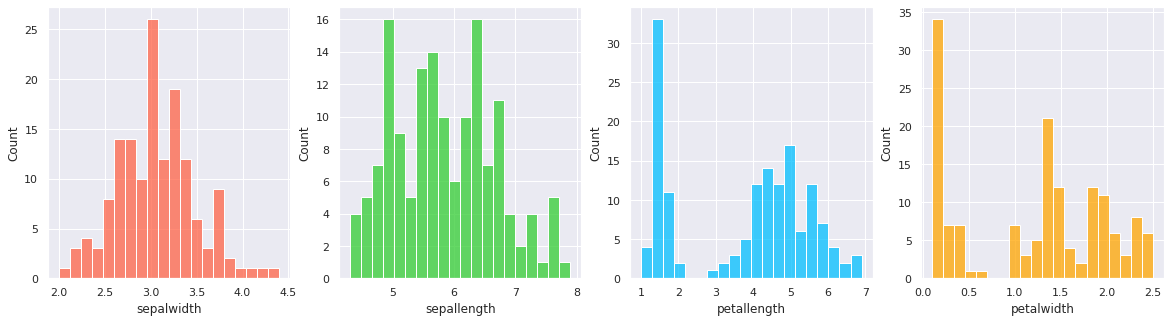

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))
sns.histplot(df['sepalwidth'], ax=ax[0], bins=20, color='tomato')
sns.histplot(df['sepallength'], ax=ax[1], bins=20, color='limegreen')
sns.histplot(df['petallength'], ax=ax[2], bins=20, color='deepskyblue')
sns.histplot(df['petalwidth'], ax=ax[3], bins=20, color='orange');

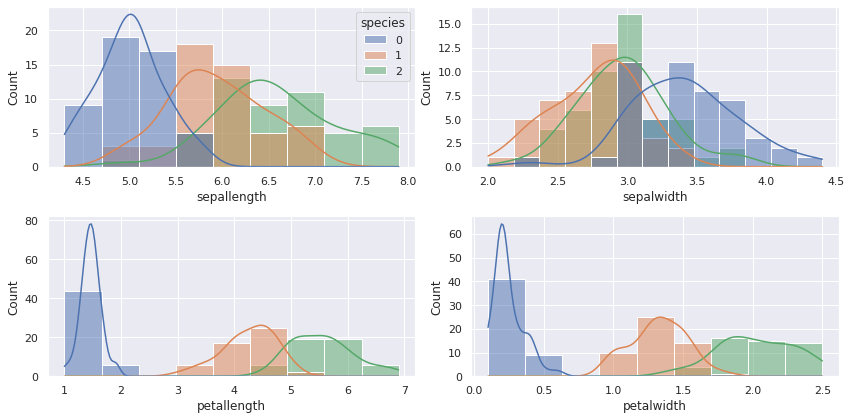

In [ ]:
from scipy.stats import norm
sns.set()
#iris = sns.load_dataset('iris')

# make the 'species' column categorical to fix the order

df['species'] = pd.Categorical(df['species'])

fig, axs = plt.subplots(2, 2, figsize = (12, 6))
for col, ax in zip(df.columns[:4], axs.flat):
    sns.histplot(data = df, x = col, kde = True, hue = 'species', common_norm = False, legend = ax == axs[0,0], ax = ax)
plt.tight_layout()
plt.show()

**Visualising using pie charts**

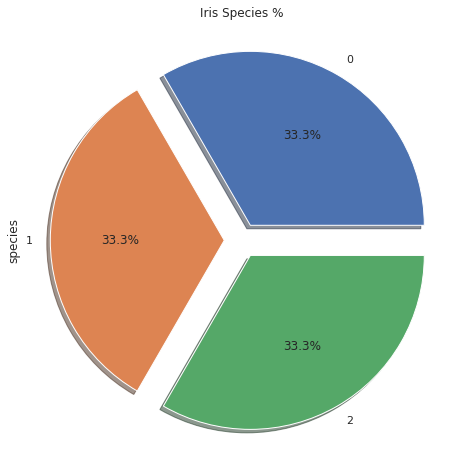

In [ ]:
ax = plt.subplots(1,1,figsize=(10,8))
df['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1], autopct = '%1.1f%%', shadow=True, figsize=(10,8))
plt.title("Iris Species %")
plt.show()

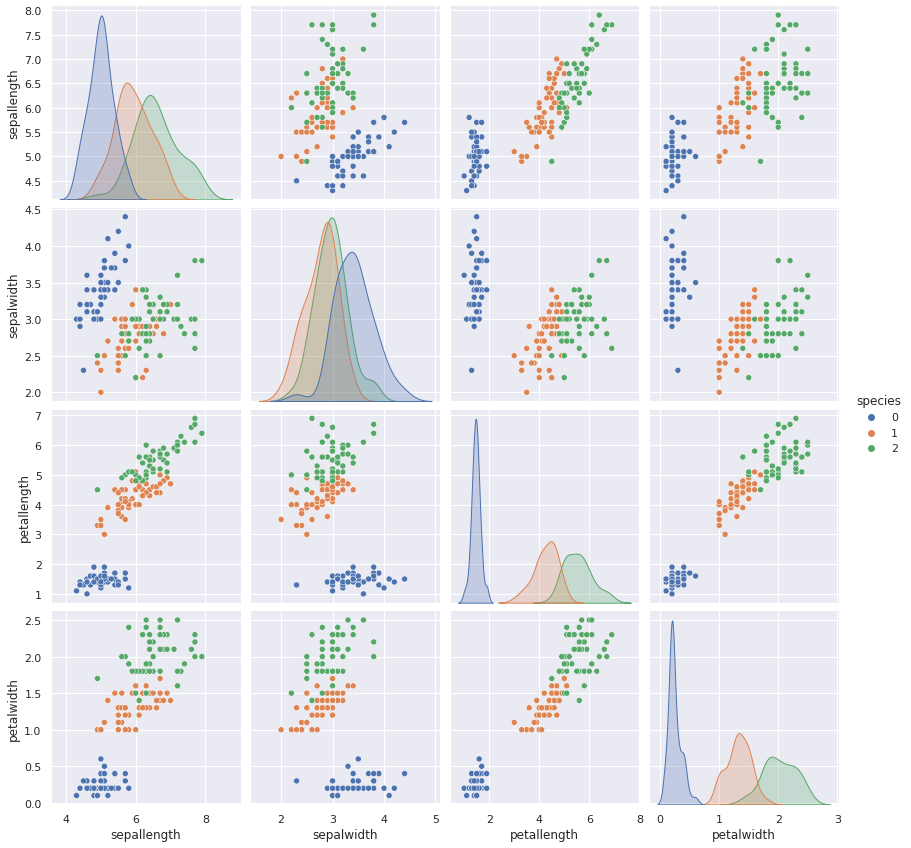

In [ ]:
sns.pairplot(df, hue="species", size=3, diag_kind="kde")
plt.show()

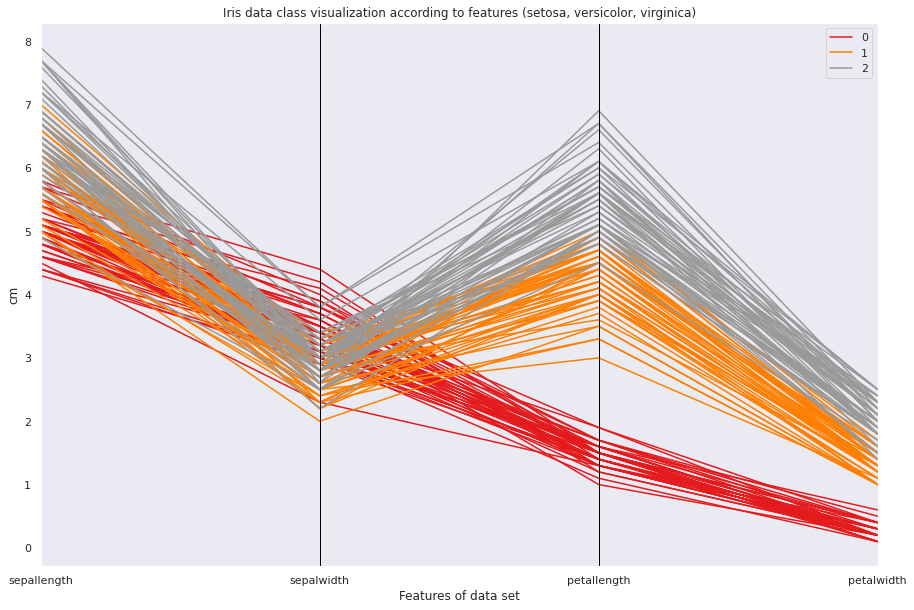

In [ ]:
# make the plot
plt.figure(figsize=(15,10))
parallel_coordinates(df, 'species', colormap = plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features (setosa, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
plt.savefig('graph.png')
plt.show()

**Spider Chart**

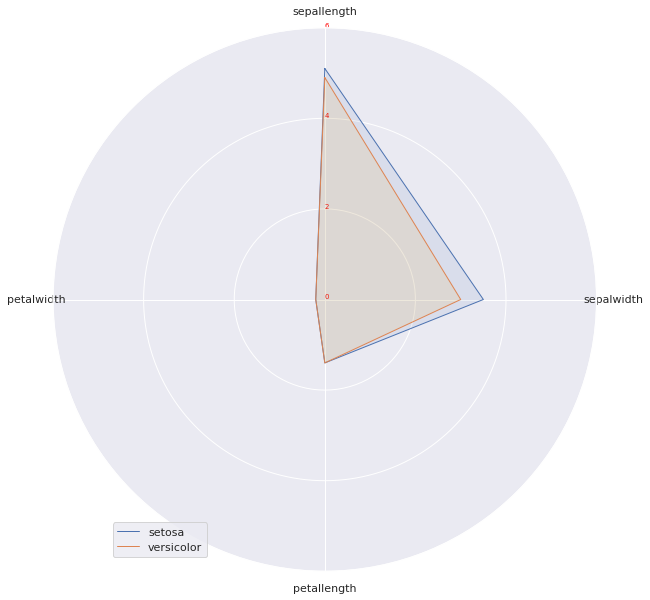

In [ ]:
# spider graph
categories = list(df)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10, 10))
ax = plt.subplot(111, polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([0, 2, 4, 6],["0", "2", "4", "6"], color = "red", size = 7)
plt.ylim(0, 6)

values = df.loc[0].drop("species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles, values, linewidth = 1, linestyle = "solid", label = "setosa")
ax.fill(angles, values, "b", alpha = 0.1)

values = df.loc[1].drop("species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles, values, linewidth = 1, linestyle = "solid", label = "versicolor")
ax.fill(angles, values, "orange", alpha = 0.1)
plt.legend(loc = "upper left", bbox_to_anchor = (0.1, 0.1))
plt.show()


correlation matrix 

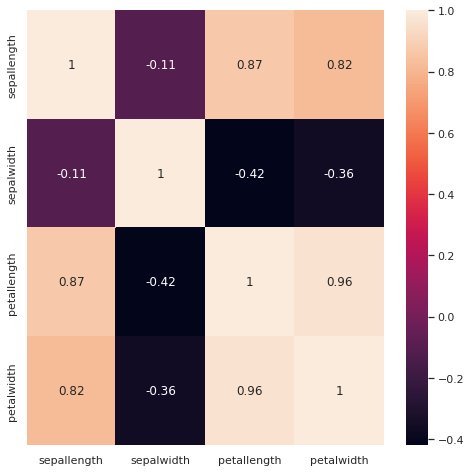

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot= True, ax=ax);

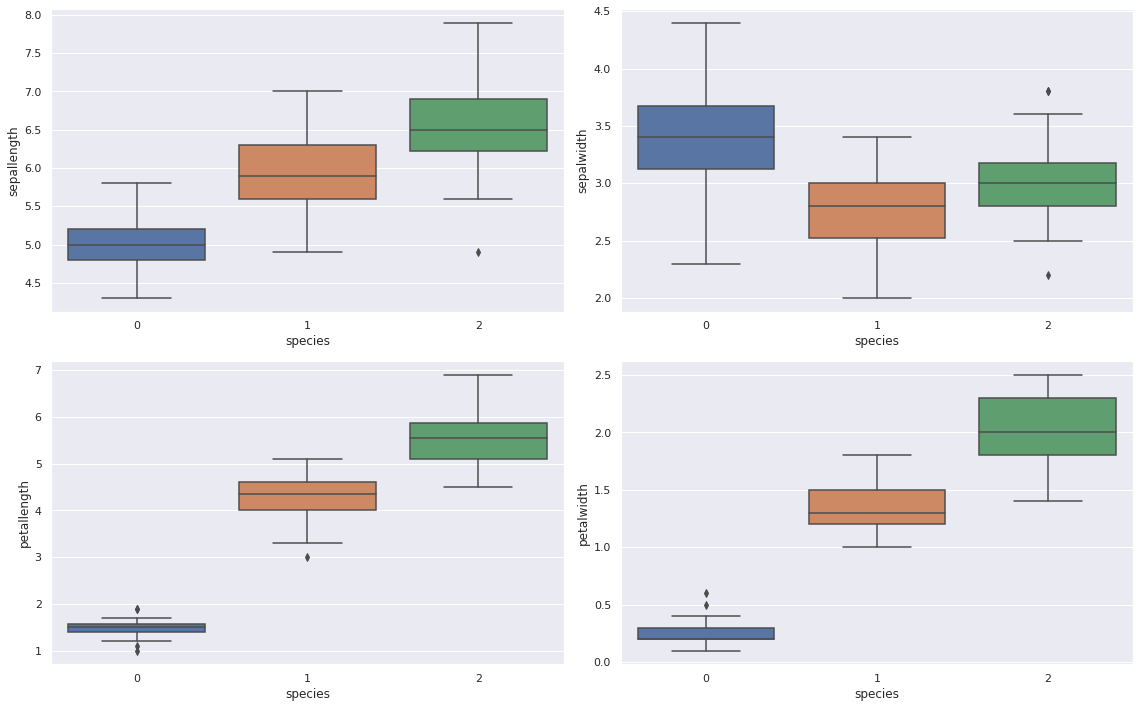

In [ ]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['species'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

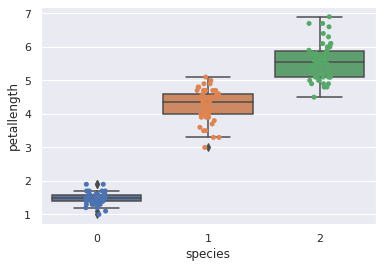

In [ ]:
ax= sns.boxplot(x="species", y="petallength", data=df)
ax= sns.stripplot(x="species", y="petallength", data=df, jitter=True, edgecolor="gray")
plt.show()

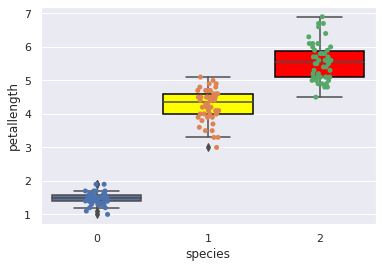

In [ ]:
ax= sns.boxplot(x="species", y="petallength", data=df)
ax= sns.stripplot(x="species", y="petallength", data=df, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

violin to show the density 

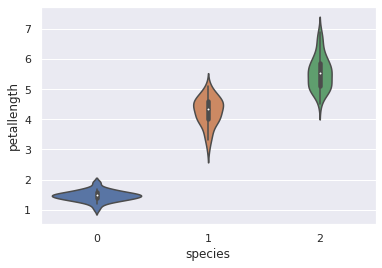

In [ ]:
sns.violinplot(x="species", y="petallength", data=df, size=6)
plt.show()

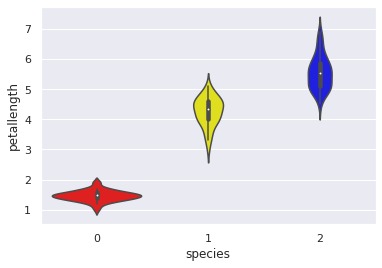

In [ ]:
sns.violinplot(x="species", y="petallength",  palette={"blue","red","yellow"}, data=df, size=6)
plt.show()

Join Plot

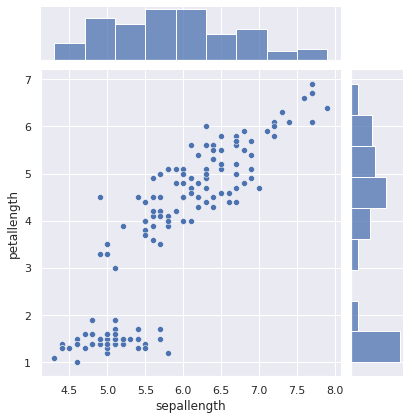

In [ ]:
sns.jointplot(data=df, x="sepallength", y="petallength")

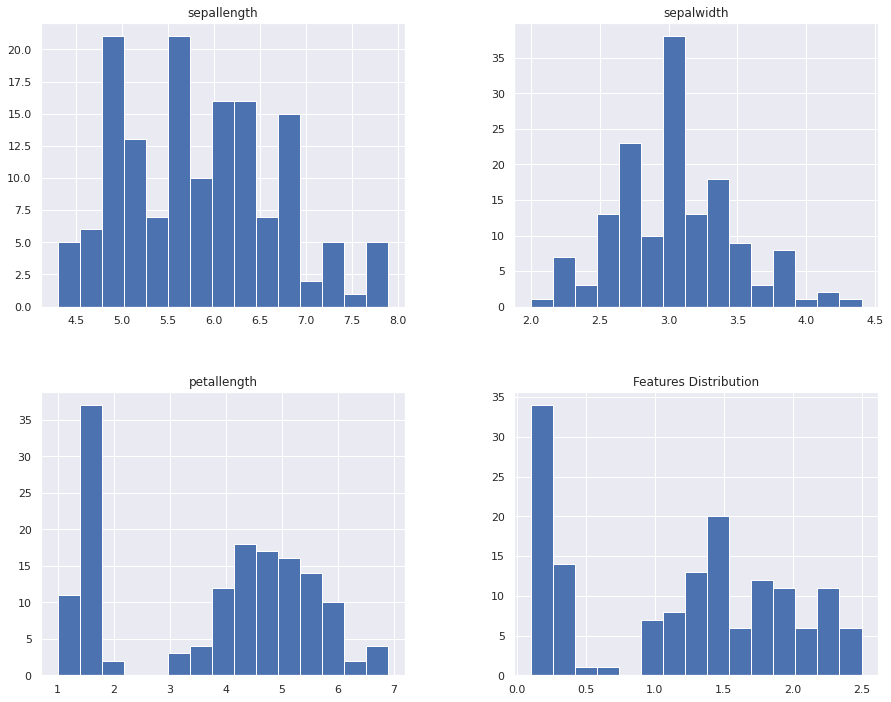

In [ ]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [42]:
df.keys()

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'], dtype='object')

PCA

In [ ]:
X = df.drop(['species'],axis=1)
y = df.species


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


With PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [ ]:
pca.get_covariance()

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

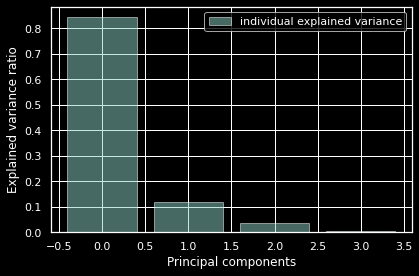

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


In [ ]:
df.species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

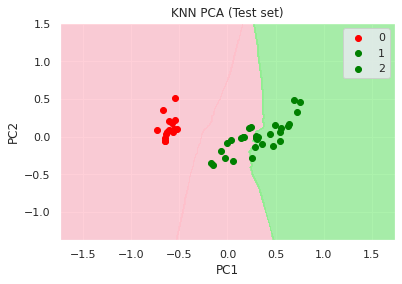

In [ ]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
!pip install wordcloud

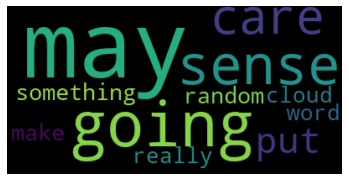

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

text = '''I have just put something random that may or may not going to make some sense 
        but are we really going to care about sense or we care about word cloud.'''

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()